In [7]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [20]:
# Cargar los datos
data = pd.read_csv('archivo_limpio.csv')

# Seleccionar las columnas relevantes para el clustering
columns = ['EDADHOM', 'EDADMUJ', 'GETHOM', 'GETMUJ', 'OCUHOM', 'OCUMUJ']

# Filtrar los datos y eliminar las filas con valores faltantes
filtered_data = data[columns].dropna()

# Filtrar los datos y eliminar las filas con valores atípicos en 'GETHOM', 'GETMUJ', 'EDADHOM' y 'EDADMUJ'
filtered_data = data[(data['EDADHOM'] < 150) & (data['EDADMUJ'] < 150) & (data['GETHOM'] < 5) & (data['GETMUJ'] < 5)]


C:\Users\Jose\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Jose\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Jose\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Jose\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  war

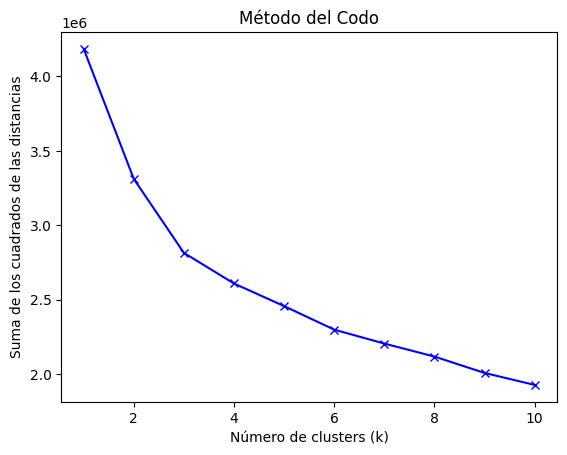

In [21]:
# Escalar los datos para que todas las características tengan la misma escala
scaler = StandardScaler()
scaled_data = scaler.fit_transform(filtered_data)

# Calcular la suma de los cuadrados de las distancias para diferentes valores de k
inertia = []
k_values = range(1, 11)  # Rango de valores de k a probar

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Graficar la curva de la suma de los cuadrados de las distancias
plt.plot(k_values, inertia, 'bx-')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Suma de los cuadrados de las distancias')
plt.title('Método del Codo')
plt.show()

In [29]:
# Aplicar el algoritmo k-means
k = 3  # Número de clusters deseado, con el metodo del codo podemos ver que 5 es un buen punto 
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(scaled_data)

# Obtener las etiquetas de los clusters y asignarlas a los datos filtrados
cluster_labels = kmeans.labels_
filtered_data['Cluster'] = cluster_labels

# Visualizar los resultados
print(filtered_data.head())


C:\Users\Jose\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


   DEPREG  MUPREG  MESREG  AÑOREG  CLAUNI  EDADHOM  EDADMUJ  GETHOM  GETMUJ  \
1      14    1412       8       9       1       16       14       1       1   
2      14    1412      10       9       1       16       14       1       1   
3      21    2102       5       9       1       16       14       2       2   
5      13    1312       3       9       1       16       14       2       2   
6      13    1314       8       9       1       16       14       1       1   

   NACHOM  ...  NUPMUJ  DEPOCU  MUPOCU  MESOCU  AÑOOCU  AREAG  ESCHOM  ESCMUJ  \
1     320  ...       1      14    1412       7       9      9       9       9   
2     320  ...       1      14    1412      10       9      9       9       9   
3     320  ...       1      21    2102       4       9      9       9       9   
5     320  ...       1      13    1312       3       9      9       9       9   
6     320  ...       1      13    1314       8       9      9       9       9   

   DIAOCU  Cluster  
1       9        

C:\Users\Jose\AppData\Local\Temp\ipykernel_11376\1091655668.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Cluster'] = cluster_labels


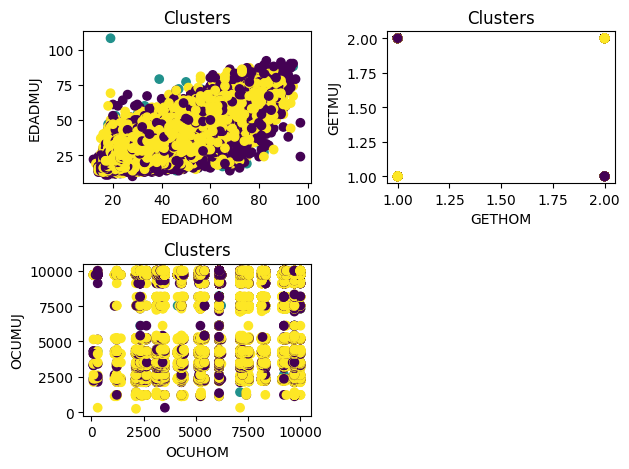

In [30]:

# Obtener las etiquetas de los clusters (asumiendo que ya has aplicado el clustering)
cluster_labels = filtered_data['Cluster']

# Crear un scatter plot para visualizar los clusters con color y tamaño de los puntos
plt.scatter(filtered_data['EDADHOM'], filtered_data['EDADMUJ'], c=cluster_labels, cmap='viridis')
plt.xlabel('EDADHOM')
plt.ylabel('EDADMUJ')
plt.title('Clusters')
plt.scatter(filtered_data['EDADHOM'], filtered_data['EDADMUJ'], c=cluster_labels, cmap='cool', alpha=0.5)

# Crear subgráficos para representar más de dos variables
plt.subplot(2, 2, 1)
plt.scatter(filtered_data['EDADHOM'], filtered_data['EDADMUJ'], c=cluster_labels, cmap='viridis')
plt.xlabel('EDADHOM')
plt.ylabel('EDADMUJ')
plt.title('Clusters')

plt.subplot(2, 2, 2)
plt.scatter(filtered_data['GETHOM'], filtered_data['GETMUJ'], c=cluster_labels, cmap='viridis')
plt.xlabel('GETHOM')
plt.ylabel('GETMUJ')
plt.title('Clusters')

plt.subplot(2, 2, 3)
plt.scatter(filtered_data['OCUHOM'], filtered_data['OCUMUJ'], c=cluster_labels, cmap='viridis')
plt.xlabel('OCUHOM')
plt.ylabel('OCUMUJ')
plt.title('Clusters')

plt.tight_layout()
plt.show()

Lo mas relevante que puedo ver yo del ordenamiento por clusters, es de los Grupos Etnicos, si ambos son del mismo grupo étnico se obtiene un comportamiento similar, mientras que si una persona es de un grupo étnico y otra es de otro grupo étnico se agrupan en un cluster diferente.

El comportamiento de los clusters entre las edades de los hombres y mujeres y las ocupaciones no se ve que tenga mayor relevancia, menos que al agruparse por edad podemos ver que sigue una forma relativamente lineal.